In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

Apply special encoding techniques as 'latin_1'

In [37]:
data = pd.read_csv('Depression_Text.csv', encoding='latin-1')

In [38]:
data

,ï»¿text,label,Age,Gender,Age Category
0,let Gather For Party,0.0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1.0,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1.0,16.0,Male,Teen Age
3,Nice picture,0.0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1.0,16.0,Male,Teen Age
...,...,...,...,...,...
7484,"""Nothing beats the feeling of achieving someth...",0.0,16.0,Female,Teen Age
7485,Too much homework Feeling Stressed!,1.0,16.0,Female,Teen Age
7486,"overworked in school,, causes me headache",1.0,16.0,Female,Teen Age
7487,How come my friends immediately get to know st...,0.0,16.0,Female,Young Age


<Axes: >

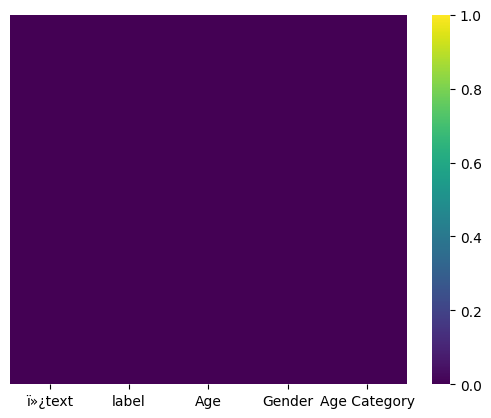

In [39]:
sns.heatmap(data.isnull(),yticklabels=False, cmap="viridis")

In [40]:
data['label'].value_counts()

label
0.0    6259
1.0    1227
Name: count, dtype: int64

In [41]:
data['label']=data['label'].astype(str).str.replace('0.0', '0')
data['label']=data['label'].astype(str).str.replace('1.0', '1')

In [42]:
data

,ï»¿text,label,Age,Gender,Age Category
0,let Gather For Party,0,16.0,Male,Teen Age
1,I hate being alive when I feel so dead inside.,1,17.0,Female,Teen Age
2,Exam are Comimg I m already Feeling Very Dep...,1,16.0,Male,Teen Age
3,Nice picture,0,16.0,Male,Teen Age
4,"Feeling worried, even though you actually have...",1,16.0,Male,Teen Age
...,...,...,...,...,...
7484,"""Nothing beats the feeling of achieving someth...",0,16.0,Female,Teen Age
7485,Too much homework Feeling Stressed!,1,16.0,Female,Teen Age
7486,"overworked in school,, causes me headache",1,16.0,Female,Teen Age
7487,How come my friends immediately get to know st...,0,16.0,Female,Young Age


In [43]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Special finding

In [44]:
data['text'] = data['ï»¿text']

In [45]:
stop_words = set(stopwords.words('english'))

Special function for pre-processing

In [46]:
def pre_processing_text(row):
    text = row['text']
    if isinstance(text, str):
        words = word_tokenize(text)
        filtered_words = [word for word in words if word.lower() not in stop_words]
        filtered_text = ' '.join(filtered_words)
        return filtered_text.lower()
    else:
        return ''

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ï»¿text       7476 non-null   object 
 1   label         7489 non-null   object 
 2   Age           7486 non-null   float64
 3   Gender        7486 non-null   object 
 4   Age Category  7486 non-null   object 
 5   text          7476 non-null   object 
dtypes: float64(1), object(5)
memory usage: 351.2+ KB


In [48]:
data['text']

0                                    let Gather For Party
1         I hate being alive when I feel so dead inside. 
2       Exam are Comimg I  m already  Feeling Very Dep...
3                                            Nice picture
4       Feeling worried, even though you actually have...
                              ...                        
7484    "Nothing beats the feeling of achieving someth...
7485                  Too much homework Feeling Stressed!
7486          overworked in school,,  causes me  headache
7487    How come my friends immediately get to know st...
7488                                  toady I wake at 5am
Name: text, Length: 7489, dtype: object

In [49]:
data.drop(columns=['ï»¿text'], inplace=True)

In [50]:
data

,label,Age,Gender,Age Category,text
0,0,16.0,Male,Teen Age,let Gather For Party
1,1,17.0,Female,Teen Age,I hate being alive when I feel so dead inside.
2,1,16.0,Male,Teen Age,Exam are Comimg I m already Feeling Very Dep...
3,0,16.0,Male,Teen Age,Nice picture
4,1,16.0,Male,Teen Age,"Feeling worried, even though you actually have..."
...,...,...,...,...,...
7484,0,16.0,Female,Teen Age,"""Nothing beats the feeling of achieving someth..."
7485,1,16.0,Female,Teen Age,Too much homework Feeling Stressed!
7486,1,16.0,Female,Teen Age,"overworked in school,, causes me headache"
7487,0,16.0,Female,Young Age,How come my friends immediately get to know st...


In [51]:
data['text'] = data.apply(pre_processing_text, axis=1)

In [52]:
data

,label,Age,Gender,Age Category,text
0,0,16.0,Male,Teen Age,let gather party
1,1,17.0,Female,Teen Age,hate alive feel dead inside .
2,1,16.0,Male,Teen Age,exam comimg already feeling depressed
3,0,16.0,Male,Teen Age,nice picture
4,1,16.0,Male,Teen Age,"feeling worried , even though actually god rea..."
...,...,...,...,...,...
7484,0,16.0,Female,Teen Age,`` nothing beats feeling achieving something '...
7485,1,16.0,Female,Teen Age,much homework feeling stressed !
7486,1,16.0,Female,Teen Age,"overworked school , , causes headache"
7487,0,16.0,Female,Young Age,come friends immediately get know strangers


In [58]:
data['Gender'].value_counts()

Gender
Male      4062
Female    3424
Name: count, dtype: int64

In [59]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [60]:
data['Gender'].dropna(inplace=True)

In [61]:
data['Gender']=data['Gender'].str.replace('Female','1')
data['Gender']=data['Gender'].str.replace('Male','0')

In [62]:
data['Gender'].value_counts()

Gender
0    4062
1    3424
Name: count, dtype: int64

In [63]:
data['Gender'].dropna(inplace=True)

In [64]:
data['Gender'].unique()

array(['0', '1', nan], dtype=object)

In [65]:
data['Gender']=data['Gender'].replace(-1,1)

In [66]:
data['Gender'].value_counts()

Gender
0    4062
1    3424
Name: count, dtype: int64

In [67]:
X_numerical = data[['Age', 'Gender']].values

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7489 entries, 0 to 7488
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   label         7489 non-null   object 
 1   Age           7486 non-null   float64
 2   Gender        7486 non-null   object 
 3   Age Category  7486 non-null   object 
 4   text          7489 non-null   object 
 5   extract_text  7489 non-null   object 
dtypes: float64(1), object(5)
memory usage: 351.2+ KB


In [69]:
data

,label,Age,Gender,Age Category,text,extract_text
0,0,16.0,0,Teen Age,let gather party,"[let gather, gather party]"
1,1,17.0,1,Teen Age,hate alive feel dead inside .,"[hate alive, alive feel, feel dead, dead insid..."
2,1,16.0,0,Teen Age,exam comimg already feeling depressed,"[exam comimg, comimg already, already feeling,..."
3,0,16.0,0,Teen Age,nice picture,[nice picture]
4,1,16.0,0,Teen Age,"feeling worried , even though actually god rea...","[feeling worried, worried ,, , even, even thou..."
...,...,...,...,...,...,...
7484,0,16.0,1,Teen Age,`` nothing beats feeling achieving something '...,"[`` nothing, nothing beats, beats feeling, fee..."
7485,1,16.0,1,Teen Age,much homework feeling stressed !,"[much homework, homework feeling, feeling stre..."
7486,1,16.0,1,Teen Age,"overworked school , , causes headache","[overworked school, school ,, , ,, , causes, c..."
7487,0,16.0,1,Young Age,come friends immediately get know strangers,"[come friends, friends immediately, immediatel..."


In [70]:
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(data['text'])
y = data['label']

In [71]:
X_combined = pd.concat([pd.DataFrame(X.toarray()), pd.DataFrame(X_numerical)], axis=1)

Split the data set

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

transfer data

In [73]:
imputer = SimpleImputer(strategy='mean')

In [74]:
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [75]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_imputed, y_train)

SVC(kernel='linear')

In [76]:
y_pred = svm_model.predict(X_test_imputed)

In [77]:
accuracy = accuracy_score(y_test, y_pred)

In [78]:
accuracy

0.9546061415220294

Final accuracy report

In [79]:
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9546061415220294
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1875
           1       0.95      0.77      0.85       372

    accuracy                           0.95      2247
   macro avg       0.95      0.88      0.91      2247
weighted avg       0.95      0.95      0.95      2247



In [80]:
pickle.dump(svm_model, open("depression.dat", "wb"))

In [88]:
with open('depression.dat' , 'rb') as f:
    model = pickle.load(f)

In [95]:
test_data = "bhagya yes you can "

In [96]:
new_text_features = tfidf_vectorizer.transform([test_data])

In [97]:
other_features = pd.DataFrame([[20, 0]], columns=['Age', 'Gender'])

In [98]:
X_sample = pd.concat([pd.DataFrame(new_text_features.toarray()), other_features], axis=1)

In [99]:
X_sample.columns = X_sample.columns.astype(str)

In [100]:
model.predict(X_sample)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array(['0'], dtype=object)